### Project overview
- Your assigned to create a movel that will predict if a user wull click on an ad or not. The data you will be given will be data from past user who have or have not clicked on a ad. This data will also provide you information of the user and certain characteristics of that user. Your target is a one hot encoding of clicked and not clicked (1,2). Create am ode that will predict this accurately

### Project approach 
- Initiailly what is known is that this will be a binary classification for the target. 
- Will create a modle that will predict the classification od clicked or not clicked
- Will analyze the data and create visualizations to get better insight on the data 

In [46]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import coremltools

In [2]:
ad_data = pd.read_csv("resources/advertising.csv")

### Data Overview
 - Data set hace 100 data points with none missing, good start!
 - we have 10 columns with "clicked on ad" being our target
 - There are a few string columns we may need to analyze or drop since we cannot bass these into our model

In [3]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### Seaborn Pair Plot - Features to clicks (Analysis)
- Below is  a plot that tells us the relation to a feature and is corelation to the Target class(Clicked on ad)
- As Age increases and more time is spent on the site the user is more likely to click on an ad
- Users with a highw income are less likely to click on ad the more time they spend on the site
- Users with a higher income are more likely to click on an ad as their dail internet usage increases

In [4]:
sns.pairplot(ad_data.drop(["Male"], axis = 1), hue = "Clicked on Ad", aspect=1.2, height=2)

### Correlation Analysis
- We will use this to find whnich features are related to each other and which are impacting the Target
- We can see that Daily Time spent on site is inversely coorelated to the ad clicks
- Also overall daily internet usage is inversely coorelated to the ad clicks
- We can safely say that the more an indicvidul uses the computer the less likey they will click on an ad
- The positive coorelation to ad clices appears to be the Age of the user,  will plot this below

In [5]:
ad_data.corr()

Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.786539  
Male                                  0.028012  1.000000      -0.038027  
Clicked on Ad                        -0.786539 -0.038027       1.000000

### Coorelation to Target

In [6]:
ad_data.corr()["Clicked on Ad"][:-1].plot(kind = "bar", figsize = (16,6))

# Analysis Continued

In [7]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

### Male to Famale
- We have a pretty evenly distributed data set relation to sex. Our results will be a be less scued to one sex

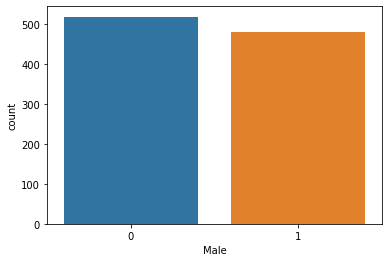

In [8]:
sns.countplot("Male", data=ad_data)

### Age range for male and female
- Age to sex is an even distribution as well 

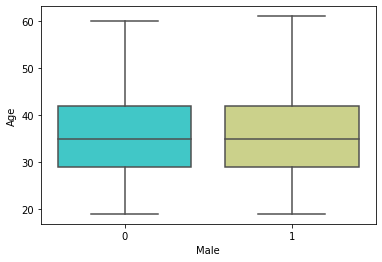

In [9]:
sns.boxplot(x = "Male", y = "Age", data=ad_data, palette="rainbow")

### Time stamp Analysis
- Will convert the TimeStamp column to a pandas data time and look at the days users are more likely to click on an ad

In [10]:
ad_data["Timestamp"] = pd.to_datetime(ad_data["Timestamp"])

In [11]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


### Feature generation of the days for clicked 

In [12]:
ad_data["day"] = ad_data['Timestamp'].apply(lambda x: x.dayofweek)

In [13]:
ad_data

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country           Timestamp  Clicked on Ad  day  
0                   Tunisia 2016-03-27 00:53:11              0    6  
1                     Nauru 2016-04-04 01:39:02              0    0  
2                San Marino 2016-03-13 20:35:42              0    6  
3                     Italy 2016-01-10 02:31:19              0    6  
4                   Iceland 2016-06-03 03:36:18              0    4  
..                      ...                 ...            ...  ...  
995                 Lebanon 2016-02-11 21:49:00              1    3  
996  Bosnia and Herzegovina 2016-04-22 02:07:01              1    4  
997                Mongolia 2016-02-01 17:24:57              1    0  
998               Guatemala 2016-03-24 02:35:54              0    3  
999                  Brazil 2016-06-03 21:43:21              1    4  

[1000 rows x 11 columns]

### Day of week analysis
- Appears more users clickd on an ad on tuesday. But also less users clidked on Thursday

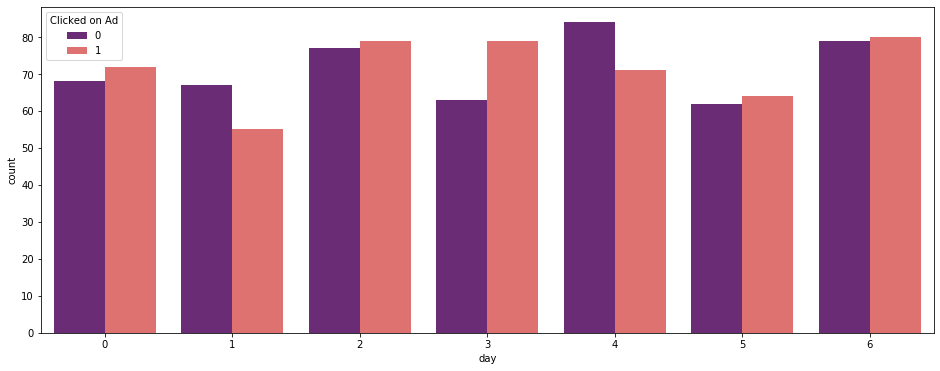

In [14]:
plt.figure(figsize=(16,6))
sns.countplot(x = "day", data=ad_data, hue="Clicked on Ad", palette="magma")

### Male to female analysis for dat of the week 
- Appears the Males are a little less likely to click on an ad on Friday

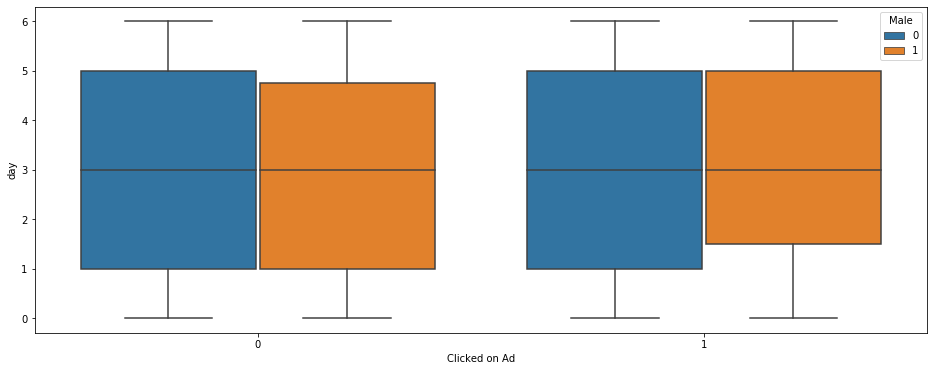

In [15]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "Clicked on Ad", y = "day", data=ad_data, hue="Male")

## Preprocessing
- There is still room for analysis but we will take a deeper dive into the data to start to train our model 
- Lets begin by removing the Values that we is not need and will not work with our model
- We will remove the Topic Line, Though we could check is the lenth of the ad topic line effects the clicks
- Will also remove the City, COuntry and Timestamp(since we have the day)

In [16]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

            Timestamp  Clicked on Ad  day  
0 2016-03-27 00:53:11              0    6  
1 2016-04-04 01:39:02              0    0  
2 2016-03-13 20:35:42              0    6  
3 2016-01-10 02:31:19              0    6  
4 2016-06-03 03:36:18              0    4

In [17]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'day'],
      dtype='object')

In [18]:
ad_data.drop(['Ad Topic Line', "Country", 'City','Timestamp'], axis=1, inplace=True)

### Finalized 
- Appears we have the data we need to complete our model

In [19]:
ad_data

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                       68.95   35     61833.90                256.09     0   
1                       80.23   31     68441.85                193.77     1   
2                       69.47   26     59785.94                236.50     0   
3                       74.15   29     54806.18                245.89     1   
4                       68.37   35     73889.99                225.58     0   
..                        ...  ...          ...                   ...   ...   
995                     72.97   30     71384.57                208.58     1   
996                     51.30   45     67782.17                134.42     1   
997                     51.63   51     42415.72                120.37     1   
998                     55.55   19     41920.79                187.95     0   
999                     45.01   26     29875.80                178.35     0   

     Clicked on Ad  day  
0                0    6  
1                0    0  
2                0    6  
3                0    6  
4                0    4  
..             ...  ...  
995              1    3  
996              1    4  
997              1    0  
998              0    3  
999              1    4  

[1000 rows x 7 columns]

### Training testing splitting
- Will seperated 20% of the data into our test set 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = ad_data.drop("Clicked on Ad", axis=1).values
y = ad_data["Clicked on Ad"].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
X_train.shape

(700, 6)

In [24]:
X_test.shape

(300, 6)

### Scaling the data
- WE will scale the data so the the full range of all points are considered and no one outlier is impacting the outcome of the model

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scalar = MinMaxScaler()

In [27]:
X_train = scalar.fit_transform(X_train)

In [28]:
X_test = scalar.transform(X_test)

### Model Preparation
- Wll add an early stopping callback to the model so that we prevent overtraining

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=20)

### Model Creation
- Will use a Sequential ANN for the model with a Few Dense Layer 
- Activation function will be a RELU
- Outout layer will be a Sigmoid function
- Loss will be a binary_crossentropy function 
- Optimizer will be Adam
- If the model is not as accurate we will add a few dropout layers

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [32]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam")

### Fitting the model

In [33]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=300, callbacks=[stop])

Train on 700 samples, validate on 300 samples
Epoch 1/300
700/700 [==============================] - 3s 4ms/sample - loss: 0.7321 - val_loss: 0.6815
Epoch 2/300
700/700 [==============================] - 0s 194us/sample - loss: 0.7029 - val_loss: 0.6762
Epoch 3/300
700/700 [==============================] - 0s 191us/sample - loss: 0.6775 - val_loss: 0.6624
Epoch 4/300
700/700 [==============================] - 0s 192us/sample - loss: 0.6615 - val_loss: 0.6375
Epoch 5/300
700/700 [==============================] - 0s 192us/sample - loss: 0.6396 - val_loss: 0.5896
Epoch 6/300
700/700 [==============================] - 0s 191us/sample - loss: 0.6138 - val_loss: 0.5487
Epoch 7/300
700/700 [==============================] - 0s 193us/sample - loss: 0.5765 - val_loss: 0.5064
Epoch 8/300
700/700 [==============================] - 0s 193us/sample - loss: 0.5544 - val_loss: 0.4461
Epoch 9/300
700/700 [==============================] - 0s 191us/sample - loss: 0.5021 - val_loss: 0.3907
Epoch 10/30

Epoch 78/300
700/700 [==============================] - 0s 195us/sample - loss: 0.1270 - val_loss: 0.1383
Epoch 79/300
700/700 [==============================] - 0s 199us/sample - loss: 0.1173 - val_loss: 0.1379
Epoch 80/300
700/700 [==============================] - 0s 201us/sample - loss: 0.1286 - val_loss: 0.1396
Epoch 81/300
700/700 [==============================] - 0s 201us/sample - loss: 0.1049 - val_loss: 0.1386
Epoch 82/300
700/700 [==============================] - 0s 207us/sample - loss: 0.1128 - val_loss: 0.1404
Epoch 83/300
700/700 [==============================] - 0s 200us/sample - loss: 0.1030 - val_loss: 0.1388
Epoch 84/300
700/700 [==============================] - 0s 211us/sample - loss: 0.1108 - val_loss: 0.1374
Epoch 85/300
700/700 [==============================] - 0s 210us/sample - loss: 0.1270 - val_loss: 0.1398
Epoch 86/300
700/700 [==============================] - 0s 201us/sample - loss: 0.1199 - val_loss: 0.1338
Epoch 87/300
700/700 [========================

### model Training Preformance
 -Model ttraining improved dramatically with the adddition to Dropout layers

In [34]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Model Predictions 
- Will look at how accurate the model predicitons are using Sklearn's metrics

In [35]:
predictions = model.predict_classes(X_test)

## Metrics 
- We get a pretty high precision on the model and this is what we want
- We are looking at a 95% accuracy at training which is amazing
- We now can predict 95% accuratly when a user will click on an ad

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       146
           1       0.97      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [38]:
print(confusion_matrix(y_test, predictions))

[[142   4]
 [  9 145]]


### Explained Varience score 
- 80% explained variance tells us that the features explains 80% of the time a user clicks or does not click on an ad

In [39]:
print(explained_variance_score(y_test,predictions))

0.8276552214908379


### Testing model
- We will pasds the model a random index without the target and see how it predicts. This will give us insite on how the model will behave when new data is passed in the future 

In [40]:
from random import randint
random_index = randint(1,len(ad_data))
random_user = ad_data.drop("Clicked on Ad", axis=1).iloc[random_index]

## New user
- Will need to reshape (same as trianing data) the new user values to fit the data them model is expecting
- Also scale the new data 

In [41]:
X_train.shape

(700, 6)

In [42]:
new_user = scalar.transform(random_user.values.reshape(1,6))

## New user predicitons

In [43]:
model.predict_classes(new_user)

array([[0]], dtype=int32)

### True Value

In [44]:
ad_data.iloc[random_index]["Clicked on Ad"]

0.0